# CLUSTERING ALGORITHMS



## 1. K-MEANS CLUSTERING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
# import the model
from sklearn.cluster import KMeans

In [7]:
# Create an array of the given shape and populate it with random
# samples from a uniform distributions over [0,1]
np.random.seed(0)
np.random.rand(5,2)



array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152]])

In [11]:
np.random.seed(0)
x = -2 * np.random.rand(100,2)# multiply all the random values with -2
x1 = 1+2*np.random.rand(50,2)

In [12]:
x[5:10, :]

array([[-1.58345008, -1.05778984],
       [-1.13608912, -1.85119328],
       [-0.14207212, -0.1742586 ],
       [-0.04043679, -1.66523969],
       [-1.5563135 , -1.7400243 ]])

In [16]:
x[50:100] = x1

In [18]:
len(x1), len(x)

(50, 100)

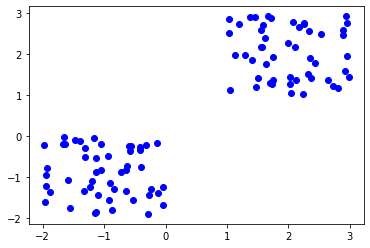

In [46]:
x[50:100,:]=x1
plt.scatter(x[:, 0],x[:, 1], c='b')
plt.show()

# Note: [:,0] means all the rows under the zero colum 
# and [:, 1] means all the rows under colum one

In [26]:
# Train the model
Kmodel = KMeans(n_clusters = 2)
Kmodel.fit(x)

KMeans(n_clusters=2)

In [27]:
# creating the centroids
Kmodel.cluster_centers_

array([[-1.0002625 , -0.89091286],
       [ 2.00465436,  2.03387358]])

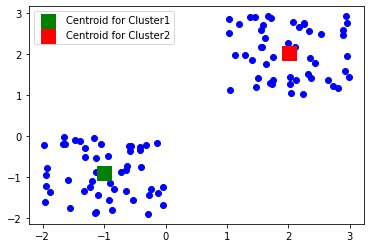

In [38]:
# showing the centroids on a scatter
plt.scatter(x[:, 0], x[:, 1], c='b')
plt.scatter(-1.0002625 , -0.89091286, s =200, c='g', marker='s',
           label='Centroid for Cluster1')
plt.scatter(2.00465436,  2.03387358, s=200, c='r', marker='s',
           label='Centroid for Cluster2')
plt.legend()
plt.show()

In [39]:
# showing the labels of the clusters of our model
Kmodel.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [45]:
# Let's make prediction on our cluster model from a random data
sample_test = np.array([-1.0, 1.0])
second_test = sample_test.reshape(1, -1)
Kmodel.predict(second_test)


array([0], dtype=int32)

### 2. HIERARCHICAL CLUSTERING

In this project, we are going to segment customers into different groups based on their shopping trends, using *Agglomerative Hierarchical Clustering*

In [47]:
cus_data = pd.read_csv('/home/bakary/Desktop/ML_Folder1/data1/shopping-data.csv')
cus_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
len(cus_data)

200

In [51]:
cus_data.value_counts()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
200         Male    30   137                 83                        1
63          Female  67   47                  52                        1
73          Female  60   50                  49                        1
72          Female  47   49                  42                        1
71          Male    70   49                  55                        1
                                                                      ..
131         Male    47   71                  9                         1
130         Male    38   71                  75                        1
129         Male    59   71                  11                        1
128         Male    40   71                  95                        1
1           Male    19   15                  39                        1
Length: 200, dtype: int64

In [66]:
# The iloc indexer for pandas dataframe is used for integer
# location based indexing/selection by position.
data = cus_data.iloc[:, 3:5].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Create a Dendogram


The reason for creating a dendogram , is to know the number of cluster we have

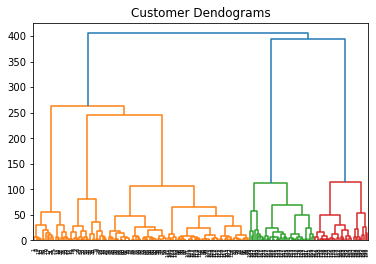

In [67]:
import scipy.cluster.hierarchy as shc
plt.title('Customer Dendograms')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

Now we know the number of clusters we have which is 5 clusters, therefore, we have to group this data into five clusters.

We need to group our data into 5 clusters since we have 5 number of clusters.

In [68]:
from sklearn.cluster import AgglomerativeClustering
clustermodel = AgglomerativeClustering(n_clusters=5, 
                                 affinity='euclidean',
                                 linkage='ward')
clustermodel.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Let's show the clusters in a scatter plot

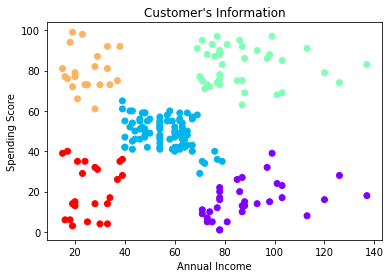

In [73]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1], c=clustermodel.labels_,
            cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer\'s Information') 
plt.show()